In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing and Preprocessing Data



In [ ]:
! pip install pyxlsb
import pandas as pd
fulldata = pd.read_excel('/content/drive/MyDrive/Datasets/TextDB/ar-2015-2016-xlsb (1).xlsb', engine='pyxlsb')


In [ ]:
fulldata

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,Total number of live births - conceived through IVF,Total number of live births - conceived through DI,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Female Factors,Cause of Infertility - Partner Sperm Concentration,Cause of Infertility - Partner Sperm Morphology,Causes of Infertility - Partner Sperm Motility,Cause of Infertility - Partner Sperm Immunological factors,Main Reason for Producing Embroys Storing Eggs,Stimulation used,Type of Ovulation Induction,Egg Donor Age at Registration,Sperm Donor Age at Registration,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,PGD,PGD treatment,...,Embryos from Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Embryos (from Eggs Micro-injected) Stored For Use By Patient,Date of Egg Collection,Date of Egg Thawing,Date of Egg Mixing,Date of Embryo Thawing,Date of Embryo Transfer,Year of Treatment,Live Birth Occurrence,Number of Live Births,Early Outcome,Number of foetal sacs with fetal pulsation,Heart One Weeks Gestation,Heart One Birth Outcome,Heart One Birth Weight,Heart OneSex,Heart One Delivery Date,Heart One Birth Congenital Abnormalities,Heart Two Weeks Gestation,Heart Two Birth Outcome,Heart Two Birth Weight,Heart Two Sex,Heart Two Delivery Date,Heart Two Birth Congenital Abnormalities,Heart Three Weeks Gestation,Heart Three Birth Outcome,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Treatment Now,0,NaN,NaN,NaN,0.0,0.0,IVF,IVF,0.0,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2016,1.0,1,Intrauterine Fetal Pulsation Seen,1,39,Live Birth,Between 3.5kg and 3.99Kg,F,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Treatment Now,1,Yes but not recorded,NaN,NaN,0.0,0.0,IVF,ICSI,0.0,NaN,...,3.0,0.0,2.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,5.0,2016,NaN,0,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,For Storing Eggs,1,Yes but not recorded,NaN,NaN,0.0,0.0,IVF,IVF,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2016,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Treatment Now,0,NaN,NaN,NaN,0.0,0.0,IVF,Unknown,0.0,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2016,NaN,0,Biochemical Pregnancy Only,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Treatment Now,1,Yes but not recorded,NaN,NaN,0.0,0.0,IVF,ICSI,0.0,NaN,...,4.0,0.0,2.0,2.

In [ ]:
print("The Patient Characteristics \n\n")
for col in fulldata.columns:
    print(col)

The Patient Characteristics 


Patient Age at Treatment
Date patient started trying to become pregnant OR date of last pregnancy
Total Number of Previous cycles, Both IVF and DI
Total Number of Previous treatments, Both IVF and DI at clinic
Total Number of Previous IVF cycles
Total Number of Previous DI cycles
Total number of previous pregnancies, Both IVF and DI
Total number of IVF pregnancies
Total number of DI pregnancies
Total number of live births - conceived through IVF or DI
Total number of live births - conceived through IVF
Total number of live births - conceived through DI
Type of Infertility - Female Primary
Type of Infertility - Female Secondary
Type of Infertility - Male Primary
Type of Infertility - Male Secondary
Type of Infertility -Couple Primary
Type of Infertility -Couple Secondary
Cause  of Infertility - Tubal disease
Cause of Infertility - Ovulatory Disorder
Cause of Infertility - Male Factor
Cause of Infertility - Patient Unexplained
Cause of Infertility - Endomet

In [ ]:
len(fulldata.columns)

95

In [ ]:
len(fulldata)

158519

In [ ]:
fulldata.pop('Date patient started trying to become pregnant OR date of last pregnancy')
fulldata.pop('Total number of DI pregnancies')
fulldata.pop('Total Number of Previous DI cycles')
fulldata.pop('Total number of live births - conceived through DI')
#fulldata.pop('Cause of Infertility -  Partner Sperm Immunological factors')
#fulldata.pop('Causes of Infertility - Partner Sperm Motility')
#fulldata.pop('Cause of Infertility -  Partner Sperm Morphology')
#fulldata.pop('Cause of Infertility - Partner Sperm Concentration')
#fulldata.pop('Cause of Infertility - Female Factors')
#fulldata.pop('Cause of Infertility - Cervical factors')
#fulldata.pop('Cause of Infertility - Endometriosis')
#fulldata.pop('Cause of Infertility - Patient Unexplained')
#fulldata.pop('Cause of Infertility - Male Factor')
#fulldata.pop('Cause of Infertility - Ovulatory Disorder')
#fulldata.pop('Cause  of Infertility - Tubal disease')
fulldata.pop('Type of Infertility -Couple Secondary')
fulldata.pop('Type of Infertility -Couple Primary')
fulldata.pop('Type of Infertility - Male Secondary')
fulldata.pop('Type of Infertility - Male Primary')
fulldata.pop('Type of Infertility - Female Secondary')
fulldata.pop('Type of Infertility - Female Primary')
fulldata.pop('Type of Ovulation Induction')
fulldata.pop('Egg Donor Age at Registration')
fulldata.pop('Sperm Donor Age at Registration')
fulldata.pop('PGD treatment')
fulldata.pop('PGS')
fulldata.pop('PGS Treatment')
fulldata.pop('Embryos Stored For Use By Patient')
fulldata.pop('Embryos (from Eggs Micro-injected) Stored For Use By Patient')
fulldata.pop('Date of Egg Collection')
fulldata.pop('Date of Egg Thawing')
fulldata.pop('Date of Egg Mixing')
fulldata.pop('Date of Embryo Thawing')
fulldata.pop('Date of Embryo Transfer')
fulldata.pop('Year of Treatment')

fulldata.pop('Heart One Birth Weight')
fulldata.pop('Heart OneSex')
#fulldata.pop('Year of Treatment')
#fulldata.pop('Year of Treatment')
#fulldata.pop('Year of Treatment')


0           F
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
158514    NaN
158515    NaN
158516    NaN
158517    NaN
158518    NaN
Name: Heart OneSex, Length: 158519, dtype: object

In [ ]:
len(fulldata.columns)

69

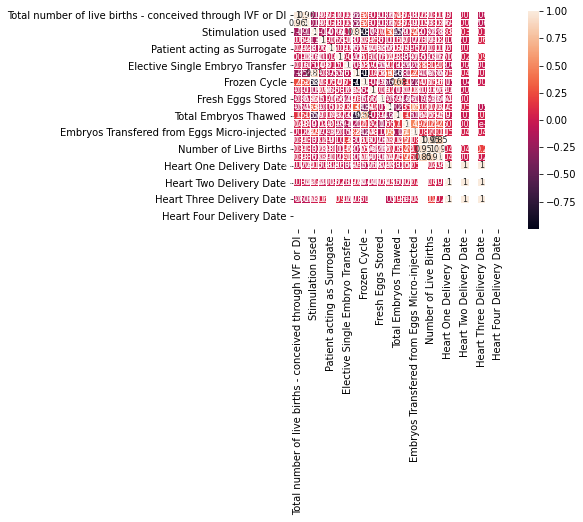

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = fulldata.corr()
sn.heatmap(corrMatrix, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8})


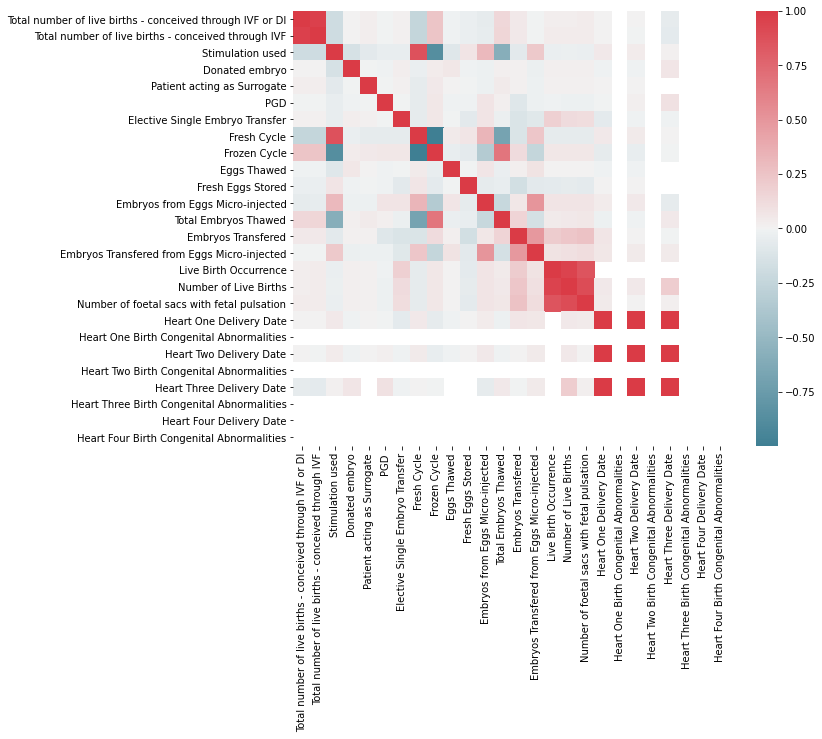

In [ ]:
import seaborn as sns
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = fulldata.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
fulldata['Live Birth Occurrence'] = fulldata['Live Birth Occurrence'].fillna(0)

fulldata['Live Birth Occurrence'].value_counts()

0.0    120437
1.0     38082
Name: Live Birth Occurrence, dtype: int64

## Reducing Dataset with Limited Parameters (6 features)

In [13]:
import pandas as pd
dataset = pd.read_excel('/content/drive/MyDrive/Datasets/TextDB/Data IVF.xlsx')

In [ ]:
dataset

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered,Live Birth Occurrence
0,42,2.0,0.0,1.0,1.0
1,50,3.0,0.0,2.0,NaN
2,37,0.0,0.0,0.0,NaN
3,25,2.0,0.0,1.0,NaN
4,25,5.0,1.0,2.0,NaN
...,...,...,...,...,...
158514,25,NaN,NaN,NaN,NaN
158515,39,NaN,NaN,NaN,NaN
158516,39,NaN,NaN,NaN,NaN
158517,25,NaN,NaN,NaN,NaN


In [14]:
#dataset.drop(dataset.loc[dataset['Number of foetal sacs with fetal pulsation']==40].index, inplace=True)
#dataset.drop(dataset.loc[dataset['Number of foetal sacs with fetal pulsation']==4].index, inplace=True)
#dataset.drop(dataset.loc[dataset['Number of foetal sacs with fetal pulsation']==3].index, inplace=True)

#dataset['Number of foetal sacs with fetal pulsation'].unique()

#dataset['Number of foetal sacs with fetal pulsation'].value_counts()

dataset['Live Birth Occurrence'] = dataset['Live Birth Occurrence'].fillna(0)

dataset['Live Birth Occurrence'].value_counts()

0.0    120437
1.0     38082
Name: Live Birth Occurrence, dtype: int64

In [ ]:
dataset

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered,Live Birth Occurrence
0,42,2.0,0.0,1.0,1.0
1,50,3.0,0.0,2.0,0.0
2,37,0.0,0.0,0.0,0.0
3,25,2.0,0.0,1.0,0.0
4,25,5.0,1.0,2.0,0.0
...,...,...,...,...,...
158514,25,NaN,NaN,NaN,0.0
158515,39,NaN,NaN,NaN,0.0
158516,39,NaN,NaN,NaN,0.0
158517,25,NaN,NaN,NaN,0.0


In [ ]:
print("The Selected Patient Characteristics \n\n")
for col in dataset.columns:
    print(col)

The Selected Patient Characteristics 


Patient Age at Treatment
Total Number of Previous IVF cycles
Total number of previous pregnancies, Both IVF and DI
Embryos Transfered
Live Birth Occurrence


In [ ]:
dataset.count()

Patient Age at Treatment                                 158519
Total Number of Previous IVF cycles                      145718
Total number of previous pregnancies, Both IVF and DI    145718
Embryos Transfered                                       145718
Live Birth Occurrence                                    158519
dtype: int64

In [15]:
dataset['Total Number of Previous IVF cycles'].isnull().values.sum()
dataset = dataset.dropna()   

In [ ]:
dataset

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered,Live Birth Occurrence
0,42,2.0,0.0,1.0,1.0
1,50,3.0,0.0,2.0,0.0
2,37,0.0,0.0,0.0,0.0
3,25,2.0,0.0,1.0,0.0
4,25,5.0,1.0,2.0,0.0
...,...,...,...,...,...
145713,39,0.0,0.0,2.0,1.0
145714,25,1.0,1.0,1.0,1.0
145715,44,1.0,0.0,2.0,0.0
145716,37,0.0,0.0,2.0,0.0


In [ ]:
#df_max_scaled = dataset.copy() 
  
# apply normalization techniques 
#for column in df_max_scaled.columns: 
#    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
#display(df_max_scaled) 

In [ ]:
dataset.describe()

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered,Live Birth Occurrence
count,145718.000000,145718.000000,145718.000000,145718.000000,145718.000000
mean,33.653262,1.286931,0.196372,1.163755,0.248151
std,7.669763,1.558616,0.465620,0.759875,0.431941
min,25.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,1.000000,0.000000,1.000000,0.000000
75%,39.000000,2.000000,0.000000,2.000000,0.000000
max,50.000000,6.000000,6.000000,3.000000,1.000000


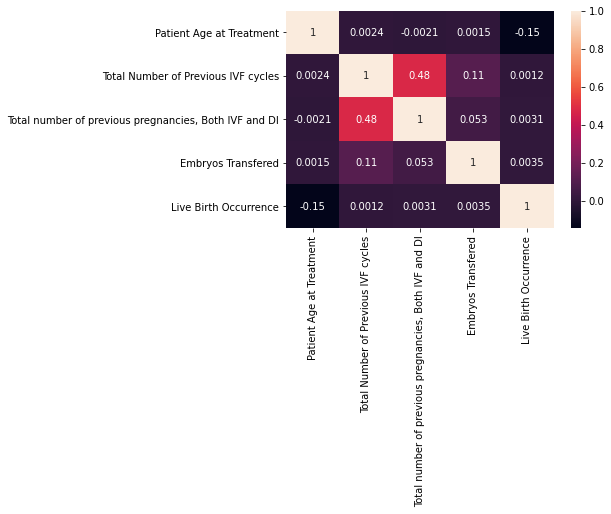

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = dataset.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset.count()

Patient Age at Treatment                                 145718
Total Number of Previous IVF cycles                      145718
Total number of previous pregnancies, Both IVF and DI    145718
Embryos Transfered                                       145718
Live Birth Occurrence                                    145718
dtype: int64

KeyboardInterrupt: ignored

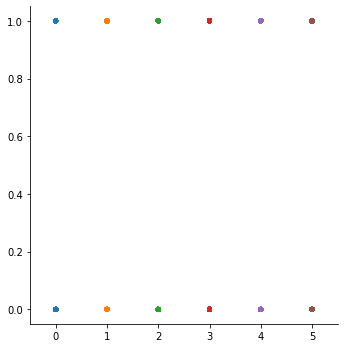

In [ ]:
sns.catplot(x="Patient Age at Treatment", y="Live Birth Occurrence", kind="swarm", data=dataset)

## Number of Embryos Transferred VS Positive Outcome

## Age Frequency 
#### Imbalance in data with higher age

Text(0, 0.5, 'Frequency')

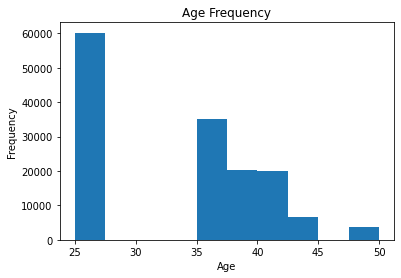

In [ ]:
fig, ax = plt.subplots()
ax.hist(dataset['Patient Age at Treatment'])
ax.set_title('Age Frequency')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

## Patient Age VS Positive Outcome Average 
#### Graph increases at age 50 due to data imbalance

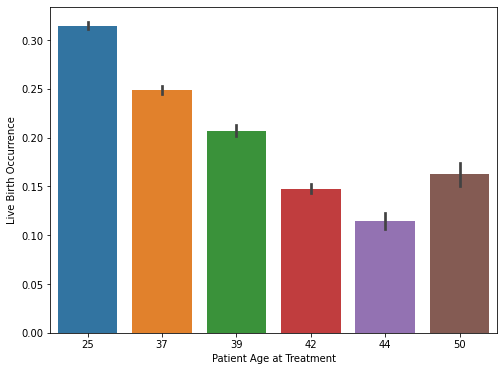

In [ ]:
import seaborn as sns
x = dataset['Patient Age at Treatment']
y = dataset['Live Birth Occurrence']
fig = plt.figure(figsize=(8,6))
sns.barplot(x="Patient Age at Treatment", y="Live Birth Occurrence", data=dataset)

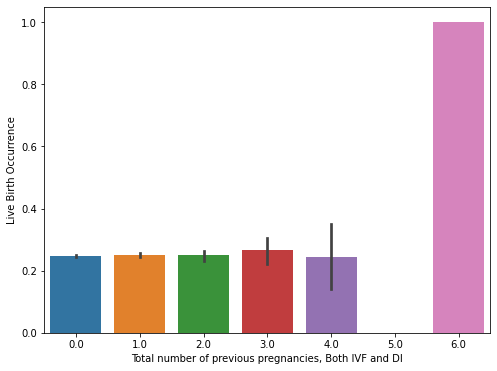

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.barplot(x="Total number of previous pregnancies, Both IVF and DI", y="Live Birth Occurrence", data=dataset)

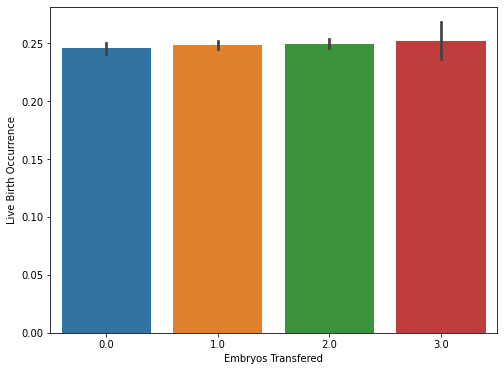

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.barplot(x="Embryos Transfered", y="Live Birth Occurrence", data=dataset)

#sns.countplot(y="Embryos Transfered", data=dataset, color="c")

#import numpy as np
#sns.countplot(x ='Embryos Transfered', y ='Live Birth Occurrence', data = dataset, palette ='plasma', estimator = np.std)

In [ ]:
dataset.count()

Patient Age at Treatment                                 145718
Total Number of Previous IVF cycles                      145718
Total number of previous pregnancies, Both IVF and DI    145718
Embryos Transfered                                       145718
Live Birth Occurrence                                    145718
dtype: int64

In [ ]:
#dataset = dataset.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=['Embryos Transfered']).fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.count()

Patient Age at Treatment                                 116566
Total Number of Previous IVF cycles                      116566
Total number of previous pregnancies, Both IVF and DI    116566
Embryos Transfered                                       116566
Live Birth Occurrence                                    116566
dtype: int64

In [16]:
target = dataset['Live Birth Occurrence']

In [17]:
dataset.pop('Live Birth Occurrence')

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145713    1.0
145714    1.0
145715    0.0
145716    0.0
145717    0.0
Name: Live Birth Occurrence, Length: 145718, dtype: float64

In [ ]:
#df_max_scaled

In [ ]:
dataset

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered
0,42,2.0,0.0,1.0
1,50,3.0,0.0,2.0
2,37,0.0,0.0,0.0
3,25,2.0,0.0,1.0
4,25,5.0,1.0,2.0
...,...,...,...,...
145713,39,0.0,0.0,2.0
145714,25,1.0,1.0,1.0
145715,44,1.0,0.0,2.0
145716,37,0.0,0.0,2.0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset, target, random_state=1, test_size=0.2)

#Logistic Regg

In [ ]:
X=dataset
y=target

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lrp = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lrp)

0.7492451276420532

# SVR 2


In [ ]:
X=dataset
y=target

In [ ]:
X

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered
0,42,2.0,0.0,1.0
1,50,3.0,0.0,2.0
2,37,0.0,0.0,0.0
3,25,2.0,0.0,1.0
4,25,5.0,1.0,2.0
...,...,...,...,...
145713,39,0.0,0.0,2.0
145714,25,1.0,1.0,1.0
145715,44,1.0,0.0,2.0
145716,37,0.0,0.0,2.0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [ ]:
X

array([[ 1.08826922,  0.4575029 , -0.421745  , -0.21550279],
       [ 2.13132983,  1.09909979, -0.421745  ,  1.10050741],
       [ 0.43635635, -0.82569088, -0.421745  , -1.53151298],
       ...,
       [ 1.34903438, -0.18409399, -0.421745  ,  1.10050741],
       [ 0.43635635, -0.82569088, -0.421745  ,  1.10050741],
       [ 0.43635635,  0.4575029 , -0.421745  ,  1.10050741]])

In [ ]:
regressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_reg = regressor.predict(X_test)

AttributeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svr_reg)

-0.11668104857208106


# KNN Regression

In [ ]:
X=dataset
y=target

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_reg=reg.fit(X_train, y_train)

In [ ]:
knn_reg = reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_reg)

ValueError: ignored

#SVM

In [ ]:
from sklearn.svm import SVC   
clf = SVC(kernel='linear')  

In [ ]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm)

In [ ]:
k = 5
kf = model_selection.KFold(n_splits=k, random_state=None)
model = SVC(kernel='linear')
 
result = cross_val_score(model , X_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()

In [ ]:
clf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf = clf2.predict(X_test)

In [ ]:
accuracy_score(y_test, rf)

0.752504803733187

In [ ]:
k = 5
kf = model_selection.KFold(n_splits=k, random_state=None)
 
result = cross_val_score(clf2 , X_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

#K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predict1 = clf1.predict(X_test)

In [ ]:
accuracy_score(y_test, predict1)

0.7054968432610486

# XG Boost Classification

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predict6 = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict6)

0.7527106780126269

In [ ]:
list1 = predict6.tolist()

In [ ]:
np.unique(predict6)

array([0.])

In [ ]:
import lightgbm 
from lightgbm import *

In [ ]:
d_train = lightgbm.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lightgbm.train(params, d_train, 100)

In [ ]:
ypred2 = clf.predict(X_test)

In [ ]:
ypred2

array([0.23450185, 0.25799724, 0.25773882, ..., 0.24830442, 0.25674181,
       0.24764126])

In [ ]:
for i in range(0,len(ypred2)):
    if ypred2[i]>=.2:       # setting threshold to .5
       ypred2[i]=1
    else:  
       ypred2[i]=0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred2)

0.24728932198737305

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred2)

array([[    0, 21937],
       [    0,  7207]])

In [ ]:
ypred2.unique()

AttributeError: ignored

In [ ]:
dataset

,Patient Age at Treatment,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Embryos Transfered
0,42,2.0,0.0,1.0
1,50,3.0,0.0,2.0
2,37,0.0,0.0,0.0
3,25,2.0,0.0,1.0
4,25,5.0,1.0,2.0
...,...,...,...,...
145713,39,0.0,0.0,2.0
145714,25,1.0,1.0,1.0
145715,44,1.0,0.0,2.0
145716,37,0.0,0.0,2.0


# Mul Regression (31.828% )

In [19]:
X = dataset[['Patient Age at Treatment','Embryos Transfered','Total Number of Previous IVF cycles',
             'Total number of previous pregnancies, Both IVF and DI']]
y = target

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=4)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
import sklearn.metrics as sm
#Variance is Difference in predicted and actual values
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2), " / 1")

Explain variance score = 0.02
R2 score = 0.02  / 1


In [ ]:
X_test

,Patient Age at Treatment,Embryos Transfered,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI"
100592,25,1,3,0
95711,25,1,0,0
96665,42,1,1,0
86535,37,1,1,0
40902,44,1,0,0
...,...,...,...,...
35050,25,2,5,0
77124,25,1,0,0
141868,39,1,1,0
68475,25,2,0,0


In [24]:
my_input1 = [[33,3,1,0]]
my_input2 = [[32,1,0,2]]

y_pred1 = regressor.predict(my_input1)
y_pred2 = regressor.predict(my_input2)

print(y_pred1, y_pred2)

[0.25539271] [0.26602646]


In [ ]:
y_pred1 = regressor.predict(my_input2)

In [ ]:
y_pred1

array([0.1165105])

In [ ]:
np.unique(y_pred)

array([0.10909511, 0.1095383 , 0.10998149, 0.11042468, 0.11086787,
       0.11122012, 0.11131107, 0.11166332, 0.11175426, 0.11210651,
       0.1125497 , 0.11299289, 0.11309945, 0.11334514, 0.11343608,
       0.11354264, 0.11378833, 0.11387927, 0.11398583, 0.11423152,
       0.11467471, 0.11487221, 0.1151179 , 0.11522446, 0.11531541,
       0.11547015, 0.1155611 , 0.11566766, 0.11591335, 0.11600429,
       0.11611085, 0.11635654, 0.11655404, 0.1166606 , 0.11679973,
       0.11699723, 0.11734948, 0.11744042, 0.11779267, 0.11823586,
       0.11867905, 0.11887656, 0.1190313 , 0.11912225, 0.11922881,
       0.1194745 , 0.11956544, 0.119672  , 0.11991769, 0.12036088,
       0.12100157, 0.12135382, 0.12169045, 0.12179701, 0.1222402 ,
       0.12243771, 0.12268339, 0.12312659, 0.12456272, 0.1252516 ,
       0.12535816, 0.15832312, 0.15876631, 0.1592095 , 0.15965269,
       0.16009589, 0.16044814, 0.16053908, 0.16089133, 0.16098227,
       0.16133452, 0.16177771, 0.1622209 , 0.16232746, 0.16257

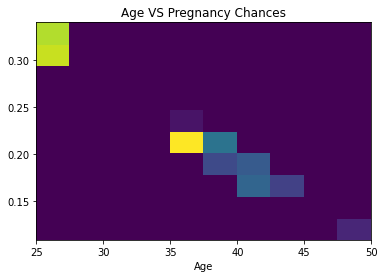

In [ ]:
x = X_test['Patient Age at Treatment']
y = y_pred

plt.hist2d(x, y)
plt.title('Age VS Pregnancy Chances')
plt.xlabel('Age')
plt.show()

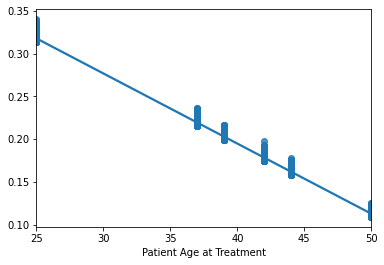

In [ ]:
sns.regplot(x=x, y=y)

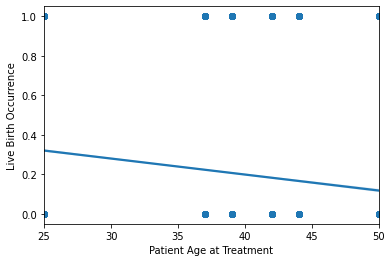

In [ ]:
sns.regplot(x=x, y=y_test);

# SVR (new) (9.999%)

In [ ]:
X = dataset[['Patient Age at Treatment','Embryos Transfered','Total Number of Previous IVF cycles','Total number of previous pregnancies, Both IVF and DI']]
y = target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf',degree=3)
regressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
import numpy as np
np.unique(y_pred)

array([0.09971491, 0.09973397, 0.09973445, 0.09973515, 0.09973961,
       0.09974063, 0.0997415 , 0.09974745, 0.09974864, 0.0997544 ,
       0.09975587, 0.09975766, 0.09976657, 0.09976667, 0.09976846,
       0.09976869, 0.09977079, 0.09977116, 0.09977207, 0.09977242,
       0.09977315, 0.09977508, 0.09977559, 0.09977929, 0.0997798 ,
       0.0997805 , 0.09978151, 0.09978195, 0.09978238, 0.09978267,
       0.09978278, 0.09978511, 0.09978541, 0.09978588, 0.09978775,
       0.09978799, 0.09978918, 0.0997903 , 0.09979042, 0.09979052,
       0.09979126, 0.09979518, 0.09979756, 0.09979768, 0.09979778,
       0.09979788, 0.09979983, 0.09980042, 0.09980244, 0.09980256,
       0.09980481, 0.09980563, 0.09980763, 0.09980796, 0.09980914,
       0.09981123, 0.09981455, 0.09981513, 0.09981543, 0.09981611,
       0.09981691, 0.09981864, 0.09981879, 0.09982048, 0.09982051,
       0.09982144, 0.09982195, 0.0998225 , 0.09982364, 0.09982541,
       0.09982752, 0.09982855, 0.09982864, 0.09982902, 0.09983

In [ ]:
X_test.head(5)

,Patient Age at Treatment,Embryos Transfered,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI"
113933,25,2.0,6.0,0.0
80879,37,2.0,1.0,0.0
106765,42,0.0,0.0,0.0
14962,39,2.0,2.0,0.0
110419,37,1.0,1.0,1.0


In [ ]:
y_test.head(5)

113933    0.0
80879     0.0
106765    0.0
14962     0.0
110419    0.0
Name: Live Birth Occurrence, dtype: float64

In [ ]:
my_input1 = [[25, 1, 0, 3]]
my_input2 = [[50, 3, 0, 2]]

y_pred1 = regressor.predict(my_input1)
y_pred2 = regressor.predict(my_input2)

print(y_pred1, y_pred2)

[0.10007399] [0.09993663]


array([0.10022329])

#KNN Regression (new) (50%)

In [ ]:
X = dataset[['Patient Age at Treatment','Embryos Transfered','Total Number of Previous IVF cycles',
             'Total number of previous pregnancies, Both IVF and DI']]
y = target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=10)

In [ ]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
np.unique(y_pred)

array([0. , 0.5, 1. ])

In [ ]:
import sklearn.metrics as sm
#Variance is Difference in predicted and actual values
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2), " / 1")

Explain variance score = 0.02
R2 score = 0.02  / 1


In [ ]:
my_input1 = [[25, 1, 0, 3]]
my_input2 = [[50, 3, 0, 2]]

y_pred1 = regressor.predict(my_input1)
y_pred2 = regressor.predict(my_input2)

print(y_pred1, y_pred2)

[0.4] [0.2]


In [ ]:
my_input = [[25, 1, 0, 0]]

In [ ]:
y_pred = regressor.predict(my_input)

In [ ]:
y_pred

array([0.34])

# Decision Tree Regression(new) (31.704%)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0, max_depth=5,max_features=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
np.unique(y_pred)

array([0.        , 0.03125   , 0.1027451 , 0.13248639, 0.13471503,
       0.15047581, 0.15162272, 0.17391304, 0.19578241, 0.20184615,
       0.21489971, 0.21828571, 0.22028986, 0.22222222, 0.23076923,
       0.23318386, 0.24922922, 0.25910931, 0.30660552, 0.31246553,
       0.31704564, 0.33010492, 0.38888889, 0.57142857, 0.75      ])

In [ ]:
my_input1 = [[25, 1, 0, 3]]
my_input2 = [[50, 3, 0, 2]]

y_pred1 = regressor.predict(my_input1)
y_pred2 = regressor.predict(my_input2)

print(y_pred1, y_pred2)

[0.31439922] [0.14994934]


In [ ]:
y_test.head(10)

126086    1
7598      1
94202     0
59296     0
46368     0
86990     0
48637     0
127061    1
139685    0
138491    0
Name: Live Birth Occurrence, dtype: int64

In [ ]:
my_input = [[25, 1, 0, 0]]

In [ ]:
y_pred = regressor.predict(my_input)

In [ ]:
y_pred

array([0.31704564])

# Random Forest Regression (new) (31.715%)

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
np.unique(y_pred)

array([0.        , 0.01481481, 0.01666667, 0.02425   , 0.02508361,
       0.02857143, 0.02903885, 0.03      , 0.032     , 0.03243243,
       0.03277592, 0.03666667, 0.04689881, 0.05079365, 0.05273945,
       0.05555556, 0.05707071, 0.05869565, 0.06363636, 0.06857143,
       0.07188764, 0.07211557, 0.07555556, 0.07784972, 0.07797813,
       0.07913956, 0.08040404, 0.08055556, 0.08119565, 0.09137931,
       0.09380542, 0.09516624, 0.09563622, 0.09714286, 0.0997471 ,
       0.1       , 0.10075255, 0.10505495, 0.10560684, 0.10636364,
       0.10833333, 0.10878499, 0.11053307, 0.11276332, 0.11425663,
       0.11452991, 0.11643877, 0.11825397, 0.11857143, 0.11877571,
       0.11984127, 0.12190476, 0.12234295, 0.12292384, 0.12522952,
       0.12605848, 0.12619188, 0.12636364, 0.12688923, 0.12896317,
       0.13017418, 0.13024329, 0.13030303, 0.13100937, 0.13196078,
       0.13282213, 0.13390881, 0.13444444, 0.13633675, 0.1388967 ,
       0.1389168 , 0.13988735, 0.14062745, 0.14160899, 0.14333

In [ ]:
my_input1 = [[25, 1, 0, 3]]
my_input2 = [[50, 3, 0, 2]]

y_pred1 = regressor.predict(my_input1)
y_pred2 = regressor.predict(my_input2)

print(y_pred1, y_pred2)

[0.26894493] [0.19883529]


In [ ]:
y_test.head(10)

126086    1
7598      1
94202     0
59296     0
46368     0
86990     0
48637     0
127061    1
139685    0
138491    0
Name: Live Birth Occurrence, dtype: int64

In [ ]:
my_input = [[25, 1, 0, 0]]

In [ ]:
y_pred = regressor.predict(my_input)

In [ ]:
y_pred

array([0.31277922])

# Polynamial Regression (new) (31.633%)

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [ ]:
np.unique(y_pred)

array([-0.00324585,  0.05475888,  0.07092437,  0.08396076,  0.08774079,
        0.08977842,  0.09235571,  0.09393034,  0.09510906,  0.09943421,
        0.10062426,  0.10076395,  0.10146806,  0.10153762,  0.10251494,
        0.10315111,  0.10423895,  0.1057706 ,  0.10634368,  0.1067501 ,
        0.10736168,  0.10736168,  0.10902899,  0.10990152,  0.11081289,
        0.1109857 ,  0.1121864 ,  0.11229304,  0.11250535,  0.112512  ,
        0.11302638,  0.11324365,  0.11332577,  0.11355423,  0.11356192,
        0.11370234,  0.11429188,  0.11473562,  0.11496192,  0.11499006,
        0.11600244,  0.11649467,  0.11688862,  0.11759888,  0.1176484 ,
        0.11868667,  0.11909994,  0.12000844,  0.1202284 ,  0.12024159,
        0.12185494,  0.12212572,  0.12224364,  0.12313956,  0.12318435,
        0.12379302,  0.12403789,  0.12493214,  0.12505204,  0.12540094,
        0.12633428,  0.12771981,  0.12781295,  0.12854011,  0.1288823 ,
        0.12943906,  0.12956267,  0.13023482,  0.13102927,  0.13

In [ ]:
my_input1 = [[25, 1, 0, 3]]
my_input2 = [[50, 3, 0, 2]]

y_pred1 = lin_reg_2.predict(poly_reg.fit_transform((my_input1)))
y_pred2 = lin_reg_2.predict(poly_reg.fit_transform((my_input2)))

print(y_pred1, y_pred2)

,Patient Age at Treatment,Embryos Transfered,Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI"
113933,25,2.0,6.0,0.0
80879,37,2.0,1.0,0.0
106765,42,0.0,0.0,0.0
14962,39,2.0,2.0,0.0
110419,37,1.0,1.0,1.0
82777,25,2.0,0.0,0.0
141859,25,1.0,0.0,0.0
84298,44,1.0,0.0,0.0
143428,39,1.0,0.0,0.0
136376,39,2.0,1.0,0.0


In [ ]:
y_test.head(10)

113933    0.0
80879     0.0
106765    0.0
14962     0.0
110419    0.0
82777     0.0
141859    1.0
84298     0.0
143428    0.0
136376    0.0
Name: Live Birth Occurrence, dtype: float64

In [ ]:
my_input = [[25, 1, 0, 0]]

In [ ]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(my_input))

In [ ]:
y_pred

# Poly Reg

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly , y_train)


# Visualising the Polynomial Regression results



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred2 = lin_reg_2.predict(poly_reg.fit_transform(X_test))


In [ ]:
np.unique(pred2)

array([0.07057815, 0.07811548, 0.07855852, 0.07861378, 0.08032884,
       0.08097207, 0.08156217, 0.08299709, 0.08397052, 0.08446343,
       0.0851477 , 0.08590951, 0.08596205, 0.08661852, 0.08710358,
       0.08737224, 0.08809291, 0.08830877, 0.08831683, 0.08845762,
       0.08864195, 0.08882217, 0.08918357, 0.08949393, 0.0900188 ,
       0.09017399, 0.09021905, 0.09034894, 0.09054996, 0.09121729,
       0.09131511, 0.09161617, 0.09167483, 0.09250819, 0.0926772 ,
       0.09289511, 0.09316871, 0.09336697, 0.09383657, 0.09463276,
       0.09468085, 0.09543807, 0.09595076, 0.09747707, 0.09754149,
       0.09755985, 0.09821046, 0.10128307, 0.10174748, 0.10177184,
       0.10191342, 0.10309282, 0.10385058, 0.10556151, 0.10759399,
       0.10788367, 0.10822562, 0.10872299, 0.10912653, 0.11132258,
       0.11387283, 0.14827892, 0.1515972 , 0.15186515, 0.15201014,
       0.15267906, 0.15284936, 0.15308628, 0.15437207, 0.15514094,
       0.15514197, 0.1552606 , 0.15555997, 0.15580213, 0.15609

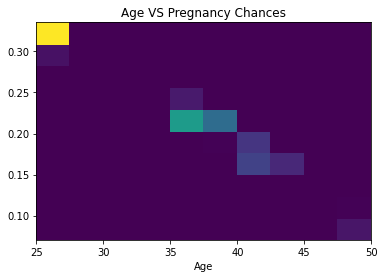

In [ ]:
x = X_test['Patient Age at Treatment']
y = pred2

plt.hist2d(x, y)
plt.title('Age VS Pregnancy Chances')
plt.xlabel('Age')
plt.show()

In [ ]:
import sklearn.metrics as sm
#Variance is Difference in predicted and actual values
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred2), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred2), 2), " / 1")

Explain variance score = 0.02
R2 score = 0.02  / 1
